In [ ]:
# Connect the google drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
cd /content/drive/MyDrive/GlobalAiHackathon2024

/content/drive/MyDrive/GlobalAiHackathon2024


In [ ]:
ls

test.csv  train.csv


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
from matplotlib import pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from collections import Counter

In [ ]:
raw_df = pd.read_csv('train.csv', index_col=0)
raw_df.head()

,Unnamed: 0,TAXPAYER_ID,FIRM_ID,CLIENT_ID,FILED_DATETIME,TAX_YEAR,REFUND,ROUTING_NUMBER1,DEPOSIT_ACCOUNT1,ROUTING_NUMBER2,DEPOSIT_ACCOUNT2,ROUTING_NUMBER3,DEPOSIT_ACCOUNT3,PTIN,IP_ADDRESS,ZIPCODE,STATE_PLACEHOLDER,STATE_ATTACHED,IS_SUSPICIOUS
0,0,58d38972-8bca-4f8a-b09d-dd3840c72f87,e1d5084f-b26f-49ee-ae44-20f49ba14323,YMCV,1/20/2021 0:59,2020,4206,cf6f5e9b-ef6a-4e5d-a018-76a1ed04e66b,cb151ba0-40d3-44fa-9084-325180fc3dee,NaN,NaN,NaN,NaN,96bc45c7-fcd1-476f-8f6c-6b3bb916b5cd,f1786c4e-a4e8-44c3-a61a-e719faeda92b,33863,47,True,False
1,1,b6ee41c8-7ec4-4a82-9c59-93623456003f,c7985081-f56d-48bc-8c41-f6213c6308ea,NEZP,1/20/2021 6:40,2020,2276,6e5e6fb4-5ecc-4e3b-b94b-a9de2315d754,9b622e78-3331-43dc-8319-1037939c9b4c,NaN,NaN,NaN,NaN,f7744112-cb96-474c-b4f2-b2f92484f00b,f54ff4d6-2e09-4810-8746-193930327a15,23929,30,True,False
2,2,c6e4e68b-7b43-40df-828e-8ae0e8a5e83b,5793ebb5-c84d-4dfe-b32e-4cf2fc818766,JMQZVSCIY,1/20/2021 7:15,2020,4373,736bc35b-25b5-429b-bcd2-14f9d807451b,5435d3fe-a0f8-474b-aedc-d8fa4cb1790a,NaN,NaN,NaN,NaN,f588237a-02e0-4e92-b4cc-5c86e7ea37b3,c0a4a946-351c-4504-b289-7b8741c8b106,56438,17,True,False
3,3,5d6a3d43-5218-4e9c-8d30-7a94351fc5e7,af8ef686-0b89-4c23-b768-97b1895753d4,CAZVH,1/20/2021 8:31,2020,1339,752b16b9-b962-4d06-8dc1-6ac20d55c959,feeb1b3c-c1b5-4354-b51a-3ef6215321d8,NaN,NaN,NaN,NaN,3508d9be-fb82-4a27-b613-446db4ea8744,c21d1fe5-8d29-4ea7-a011-1b5c669ad647,37826,6,False,False
4,4,92f738fe-2c04-416a-9d08-24c1d51a23c9,e7ce1baf-4ca7-4ee1-9daa-e1d2506be956,UTYZ,1/20/2021 9:46,2020,3388,9fb90110-577c-444c-889f-cafed1da6a0b,2f19f5c8-ae53-406e-a7cc-41b21641fb90,NaN,NaN,NaN,NaN,426e5759-33cb-4e38-9cd7-f2993232f1bd,16d0f8ca-74bf-4fdf-8b12-cede25538a6d,23380,50,True,False


In [ ]:
# prompt: filter the dataframe so that it only extracts  IS_SUSPICIOUS = 1

df_true = raw_df[raw_df['IS_SUSPICIOUS'] == False]
df_true.head()

,Unnamed: 0,TAXPAYER_ID,FIRM_ID,CLIENT_ID,FILED_DATETIME,TAX_YEAR,REFUND,ROUTING_NUMBER1,DEPOSIT_ACCOUNT1,ROUTING_NUMBER2,DEPOSIT_ACCOUNT2,ROUTING_NUMBER3,DEPOSIT_ACCOUNT3,PTIN,IP_ADDRESS,ZIPCODE,STATE_PLACEHOLDER,STATE_ATTACHED,IS_SUSPICIOUS
0,0,58d38972-8bca-4f8a-b09d-dd3840c72f87,e1d5084f-b26f-49ee-ae44-20f49ba14323,YMCV,1/20/2021 0:59,2020,4206,cf6f5e9b-ef6a-4e5d-a018-76a1ed04e66b,cb151ba0-40d3-44fa-9084-325180fc3dee,NaN,NaN,NaN,NaN,96bc45c7-fcd1-476f-8f6c-6b3bb916b5cd,f1786c4e-a4e8-44c3-a61a-e719faeda92b,33863,47,True,False
1,1,b6ee41c8-7ec4-4a82-9c59-93623456003f,c7985081-f56d-48bc-8c41-f6213c6308ea,NEZP,1/20/2021 6:40,2020,2276,6e5e6fb4-5ecc-4e3b-b94b-a9de2315d754,9b622e78-3331-43dc-8319-1037939c9b4c,NaN,NaN,NaN,NaN,f7744112-cb96-474c-b4f2-b2f92484f00b,f54ff4d6-2e09-4810-8746-193930327a15,23929,30,True,False
2,2,c6e4e68b-7b43-40df-828e-8ae0e8a5e83b,5793ebb5-c84d-4dfe-b32e-4cf2fc818766,JMQZVSCIY,1/20/2021 7:15,2020,4373,736bc35b-25b5-429b-bcd2-14f9d807451b,5435d3fe-a0f8-474b-aedc-d8fa4cb1790a,NaN,NaN,NaN,NaN,f588237a-02e0-4e92-b4cc-5c86e7ea37b3,c0a4a946-351c-4504-b289-7b8741c8b106,56438,17,True,False
3,3,5d6a3d43-5218-4e9c-8d30-7a94351fc5e7,af8ef686-0b89-4c23-b768-97b1895753d4,CAZVH,1/20/2021 8:31,2020,1339,752b16b9-b962-4d06-8dc1-6ac20d55c959,feeb1b3c-c1b5-4354-b51a-3ef6215321d8,NaN,NaN,NaN,NaN,3508d9be-fb82-4a27-b613-446db4ea8744,c21d1fe5-8d29-4ea7-a011-1b5c669ad647,37826,6,False,False
4,4,92f738fe-2c04-416a-9d08-24c1d51a23c9,e7ce1baf-4ca7-4ee1-9daa-e1d2506be956,UTYZ,1/20/2021 9:46,2020,3388,9fb90110-577c-444c-889f-cafed1da6a0b,2f19f5c8-ae53-406e-a7cc-41b21641fb90,NaN,NaN,NaN,NaN,426e5759-33cb-4e38-9cd7-f2993232f1bd,16d0f8ca-74bf-4fdf-8b12-cede25538a6d,23380,50,True,False


In [ ]:
# prompt: filter the dataframe so that it only extracts  IS_SUSPICIOUS = 1

df_sus = raw_df[raw_df['IS_SUSPICIOUS'] == True]
df_sus.head()

,Unnamed: 0,TAXPAYER_ID,FIRM_ID,CLIENT_ID,FILED_DATETIME,TAX_YEAR,REFUND,ROUTING_NUMBER1,DEPOSIT_ACCOUNT1,ROUTING_NUMBER2,DEPOSIT_ACCOUNT2,ROUTING_NUMBER3,DEPOSIT_ACCOUNT3,PTIN,IP_ADDRESS,ZIPCODE,STATE_PLACEHOLDER,STATE_ATTACHED,IS_SUSPICIOUS
8310,8310,0f89d168-ef66-4984-baa0-949961521ecb,fb173f4b-ca08-4623-8038-e1456abc733a,XMOETEQAY,04:40.7,2020,6560,ed86a31f-c21c-4547-bedb-308e6d36cbee,7c7e862b-812d-446b-9e6d-f21427351bc2,NaN,NaN,NaN,NaN,e980b2c4-014a-4cdc-b2b7-b4d7a0ca91ba,b70daf54-af37-4557-bcbc-75735f9dcd65,29229,13,True,True
14400,14400,33e60548-787c-4114-89e0-39078481e25f,32dc1ad9-f5f5-4570-b67b-a2175f08816b,CMPJ,25:12.0,2020,10390,46843026-9c4f-4974-91a6-5b6b330d174a,b59b22af-6250-40c9-804b-0f07437291b0,NaN,NaN,NaN,NaN,4dd340d5-ea28-42fc-803f-9b0b353de015,d4208da3-a389-414b-8b8e-dfa269cd716c,44575,15,True,True
21993,21993,2bb396aa-041a-464a-bf08-a68eab876e48,b0a5144a-eb85-407e-9989-e8c7c57a34f9,GMVXGKR,59:06.2,2020,11592,af030bea-c897-4dc5-88df-33a7975f4629,5c96a7ff-c58a-4268-9f47-92cfa52ffd9d,NaN,NaN,NaN,NaN,8d34caac-be26-44e7-a2a9-03a541538f88,1ee19b36-d886-4282-a7ac-e8a8c45fd64c,43703,21,True,True
23037,23037,ef4dc890-8112-49a0-ac31-5f5cf5b31fab,0355f163-b4ac-4c1a-b118-717a821aceab,CUCS,52:55.0,2020,8640,44f92ba1-24d9-4211-932c-943a1035b682,dad09c7d-ae05-4cd0-a4e1-bc4c194afda9,NaN,NaN,NaN,NaN,ee768edc-1ca0-4c04-af87-a453779ec27a,70b0f6dc-782a-41b0-bd24-ccd8c015cbc4,96319,35,False,True
23053,23053,4c9504fa-7ca2-4c73-ab44-b634863a13eb,0355f163-b4ac-4c1a-b118-717a821aceab,SUZTRBOA,00:33.2,2020,4567,1171a39a-a71b-42ae-801d-d20ce0f28828,05d16641-9df5-4ad7-a318-d7ab3f820143,NaN,NaN,NaN,NaN,ee768edc-1ca0-4c04-af87-a453779ec27a,70b0f6dc-782a-41b0-bd24-ccd8c015cbc4,59189,43,True,True


In [ ]:
# prompt: count the number of times entry has occured for TAXPAYER_ID and sort it by count in descending order

count_taxpayer_id = df_sus['FIRM_ID'].value_counts().sort_values(ascending=False)
count_taxpayer_id.head()


FIRM_ID
e7559a6e-ed93-44a9-9e9c-38c418ef9c93    28
f07c62be-3d94-4d80-8ab1-c48841a55af8    26
558cb3f8-c07d-4072-b4c5-4d13cc47e51a    23
892aff0e-4158-4adc-9f79-0f0ed1acccb9    19
7a75e00e-d502-4ddf-b528-25acac3d042b    19
Name: count, dtype: int64

In [ ]:
# prompt: count the number of times entry has occured for TAXPAYER_ID and sort it by count in descending order

count_taxpayer_id = df_sus['STATE_PLACEHOLDER'].value_counts().sort_values(ascending=False)
count_taxpayer_id.head()


STATE_PLACEHOLDER
21    9
29    9
37    6
34    6
11    6
Name: count, dtype: int64

In [ ]:
# prompt: count the number of times entry has occured for TAXPAYER_ID and sort it by count in descending order

count_taxpayer_id = df_sus['STATE_PLACEHOLDER'].value_counts().sort_values(ascending=False)
count_taxpayer_id.head()


STATE_PLACEHOLDER
21    9
29    9
37    6
34    6
11    6
Name: count, dtype: int64

In [ ]:
# prompt: count the number of times entry has occured for TAXPAYER_ID and sort it by count in descending order

count_taxpayer_id = df_true['FIRM_ID'].value_counts().sort_values(ascending=False)
count_taxpayer_id.head()


FIRM_ID
b9bef128-3a77-487c-a06d-4caa7de92ec8    287
1e63048f-0cef-4925-aa3a-0c1743e63100    252
3f096177-18b7-4315-997b-345637d41fa0    250
ed846c7f-f472-433e-812a-de6dffacfb5d    250
2332a6a6-c91f-4992-9975-fb8764b554d3    249
Name: count, dtype: int64

# Visualization

In [ ]:
labels=["Not Suspicious","Suspicious"]

fraud_or_not = raw_df["IS_SUSPICIOUS"].value_counts().tolist()
values = [fraud_or_not[0], fraud_or_not[1]]

fig = px.pie(values=raw_df['IS_SUSPICIOUS'].value_counts(), names=labels , width=700, height=400, color_discrete_sequence=["skyblue","black"]
             ,title="Fraud vs Genuine transactions")
fig.show()

<ipython-input-14-ef27ddf0252f>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




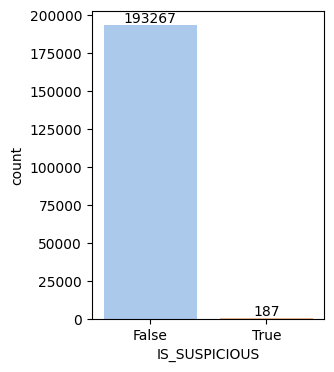

In [ ]:
plt.figure(figsize=(3,4))
ax = sns.countplot(x='IS_SUSPICIOUS',data=raw_df,palette="pastel")
for i in ax.containers:
    ax.bar_label(i,)

In [ ]:
print('Genuine:', round(raw_df['IS_SUSPICIOUS'].value_counts()[0]/len(raw_df) * 100,2), '% of the dataset')
print('Frauds:', round(raw_df['IS_SUSPICIOUS'].value_counts()[1]/len(raw_df) * 100,2), '% of the dataset')

Genuine: 99.9 % of the dataset
Frauds: 0.1 % of the dataset


In [ ]:
df = raw_df.copy()

df.drop_duplicates(inplace=True)
print("Duplicated values dropped succesfully")
print("*" * 100)

Duplicated values dropped succesfully
****************************************************************************************************


In [ ]:
df.head()

,Unnamed: 0,TAXPAYER_ID,FIRM_ID,CLIENT_ID,FILED_DATETIME,TAX_YEAR,REFUND,ROUTING_NUMBER1,DEPOSIT_ACCOUNT1,ROUTING_NUMBER2,DEPOSIT_ACCOUNT2,ROUTING_NUMBER3,DEPOSIT_ACCOUNT3,PTIN,IP_ADDRESS,ZIPCODE,STATE_PLACEHOLDER,STATE_ATTACHED,IS_SUSPICIOUS
0,0,58d38972-8bca-4f8a-b09d-dd3840c72f87,e1d5084f-b26f-49ee-ae44-20f49ba14323,YMCV,1/20/2021 0:59,2020,4206,cf6f5e9b-ef6a-4e5d-a018-76a1ed04e66b,cb151ba0-40d3-44fa-9084-325180fc3dee,NaN,NaN,NaN,NaN,96bc45c7-fcd1-476f-8f6c-6b3bb916b5cd,f1786c4e-a4e8-44c3-a61a-e719faeda92b,33863,47,True,False
1,1,b6ee41c8-7ec4-4a82-9c59-93623456003f,c7985081-f56d-48bc-8c41-f6213c6308ea,NEZP,1/20/2021 6:40,2020,2276,6e5e6fb4-5ecc-4e3b-b94b-a9de2315d754,9b622e78-3331-43dc-8319-1037939c9b4c,NaN,NaN,NaN,NaN,f7744112-cb96-474c-b4f2-b2f92484f00b,f54ff4d6-2e09-4810-8746-193930327a15,23929,30,True,False
2,2,c6e4e68b-7b43-40df-828e-8ae0e8a5e83b,5793ebb5-c84d-4dfe-b32e-4cf2fc818766,JMQZVSCIY,1/20/2021 7:15,2020,4373,736bc35b-25b5-429b-bcd2-14f9d807451b,5435d3fe-a0f8-474b-aedc-d8fa4cb1790a,NaN,NaN,NaN,NaN,f588237a-02e0-4e92-b4cc-5c86e7ea37b3,c0a4a946-351c-4504-b289-7b8741c8b106,56438,17,True,False
3,3,5d6a3d43-5218-4e9c-8d30-7a94351fc5e7,af8ef686-0b89-4c23-b768-97b1895753d4,CAZVH,1/20/2021 8:31,2020,1339,752b16b9-b962-4d06-8dc1-6ac20d55c959,feeb1b3c-c1b5-4354-b51a-3ef6215321d8,NaN,NaN,NaN,NaN,3508d9be-fb82-4a27-b613-446db4ea8744,c21d1fe5-8d29-4ea7-a011-1b5c669ad647,37826,6,False,False
4,4,92f738fe-2c04-416a-9d08-24c1d51a23c9,e7ce1baf-4ca7-4ee1-9daa-e1d2506be956,UTYZ,1/20/2021 9:46,2020,3388,9fb90110-577c-444c-889f-cafed1da6a0b,2f19f5c8-ae53-406e-a7cc-41b21641fb90,NaN,NaN,NaN,NaN,426e5759-33cb-4e38-9cd7-f2993232f1bd,16d0f8ca-74bf-4fdf-8b12-cede25538a6d,23380,50,True,False


In [ ]:
df = df.drop(['FILED_DATETIME','TAXPAYER_ID','FIRM_ID','CLIENT_ID','ROUTING_NUMBER1','DEPOSIT_ACCOUNT1','ROUTING_NUMBER2','DEPOSIT_ACCOUNT2','ROUTING_NUMBER3','DEPOSIT_ACCOUNT3','PTIN','IP_ADDRESS'],axis=1)

In [ ]:
df.head()

,Unnamed: 0,TAX_YEAR,REFUND,ZIPCODE,STATE_PLACEHOLDER,STATE_ATTACHED,IS_SUSPICIOUS
0,0,2020,4206,33863,47,True,False
1,1,2020,2276,23929,30,True,False
2,2,2020,4373,56438,17,True,False
3,3,2020,1339,37826,6,False,False
4,4,2020,3388,23380,50,True,False


In [ ]:
# PREPROCESS DATA
# Normalize REFUND column
df_temp = df.drop(['TAX_YEAR', 'ZIPCODE', 'STATE_PLACEHOLDER', 'STATE_ATTACHED', 'IS_SUSPICIOUS'], axis=1)
df = df.drop(['REFUND'], axis=1)
df_norm = (df_temp - df_temp.min()) / (df_temp.max() - df_temp.min())
df = pd.concat([df, df_norm], axis=1)

print('REFUND')
print(df.head())

# One hot encode TAX_YEAR/ZIPCODE/STATE_PLACEHOLDER columns
tax_years_ohe = pd.get_dummies(df.TAX_YEAR)
# zipcode_ohe = pd.get_dummies(df.ZIPCODE)
state_placeholder_ohe = pd.get_dummies(df.STATE_PLACEHOLDER)

df = pd.concat([df, tax_years_ohe], axis=1)
# df = pd.concat([df, zipcode_ohe], axis=1)
df = pd.concat([df, state_placeholder_ohe], axis=1)

df = df.drop(['TAX_YEAR', 'ZIPCODE', 'STATE_PLACEHOLDER'], axis=1)

print('ONE HOT ENCODE')
print(df.head())

REFUND
   Unnamed: 0  TAX_YEAR  ZIPCODE  STATE_PLACEHOLDER  STATE_ATTACHED  \
0           0      2020    33863                 47            True   
1           1      2020    23929                 30            True   
2           2      2020    56438                 17            True   
3           3      2020    37826                  6           False   
4           4      2020    23380                 50            True   

   IS_SUSPICIOUS  Unnamed: 0    REFUND  
0          False    0.000000  0.222304  
1          False    0.000005  0.120296  
2          False    0.000010  0.231131  
3          False    0.000016  0.070772  
4          False    0.000021  0.179070  
ONE HOT ENCODE
   Unnamed: 0  STATE_ATTACHED  IS_SUSPICIOUS  Unnamed: 0    REFUND  2020  \
0           0            True          False    0.000000  0.222304  True   
1           1            True          False    0.000005  0.120296  True   
2           2            True          False    0.000010  0.231131  True   
3

In [ ]:
X = df.drop('IS_SUSPICIOUS', axis=1)
y = df['IS_SUSPICIOUS']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size = 0.3, random_state = 42)

In [ ]:
from sklearn.preprocessing import StandardScaler

# Creating function for scaling
def Standard_Scaler (df, col_names):
    features = df[col_names]
    scaler = StandardScaler().fit(features.values)
    features = scaler.transform(features.values)
    df[col_names] = features

    return df

In [ ]:
col_names = ['REFUND']
X_train = Standard_Scaler (X_train, col_names)
X_test = Standard_Scaler (X_test, col_names)

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier

#We are going to ensure that we have the same splits of the data every time.
#We can ensure this by creating a KFold object, kf, and passing cv=kf instead of the more common cv=5.

kf = StratifiedKFold(n_splits=5, shuffle=False)

In [ ]:
rf = RandomForestClassifier(n_estimators=100, random_state=13)

In [ ]:
score = cross_val_score(rf, X_train, y_train, cv=kf, scoring='recall')
print("Cross Validation Recall scores are: {}".format(score))
print("Average Cross Validation Recall score: {}".format(score.mean()))

Cross Validation Recall scores are: [0.5        0.51851852 0.65384615 0.61538462 0.53846154]
Average Cross Validation Recall score: 0.5652421652421652


In [ ]:
# TAKES A LOT OF TIME _ WILL LEAVE IT RUNNING OVERNIGHT TONIGHT FOR GETTING THE BASE RESULT
# from sklearn.model_selection import GridSearchCV

# params = {
#     'n_estimators': [50, 100, 200],
#     'max_depth': [4, 6, 10, 12],
#     'random_state': [13]
# }

# grid_rf = GridSearchCV(rf, param_grid=params, cv=kf,
#                           scoring='recall').fit(X_train, y_train)
# print('Best parameters:', grid_rf.best_params_)
# print('Best score:', grid_rf.best_score_)

In [ ]:
rf = RandomForestClassifier(n_estimators=100, max_depth=12, random_state=13)
# Compute cross-validation recall scores
score = cross_val_score(rf, X_train, y_train, cv=kf, scoring='recall')
print("Cross Validation Recall scores are: {}".format(score))
print("Average Cross Validation Recall score: {}".format(score.mean()))

Cross Validation Recall scores are: [0.5        0.48148148 0.65384615 0.61538462 0.5       ]
Average Cross Validation Recall score: 0.5501424501424501


In [ ]:
# Fit the model on the entire training data
rf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf.predict(X_test)

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[57980     1]
 [   27    29]]


In [ ]:
import zipcodes

In [ ]:
pip install zipcodes

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.6/719.6 kB 5.1 MB/s eta 0:00:00


In [ ]:
zipcodes.is_real('43703')

False

In [ ]:
y_train.value_counts()

IS_SUSPICIOUS
False    135286
True        131
Name: count, dtype: int64

# Random Oversampling

In [ ]:
from imblearn.over_sampling import RandomOverSampler
# define oversampling strategy
ros = RandomOverSampler(random_state=42)

In [ ]:
# fit and apply the transform
X_over, y_over = ros.fit_resample(X_train, y_train)

In [ ]:
print('Genuine:', y_over.value_counts()[0], '/', round(y_over.value_counts()[0]/len(y_over) * 100,2), '% of the dataset')
print('Frauds:', y_over.value_counts()[1], '/',round(y_over.value_counts()[1]/len(y_over) * 100,2), '% of the dataset')

Genuine: 135286 / 50.0 % of the dataset
Frauds: 135286 / 50.0 % of the dataset


In [ ]:
from imblearn.pipeline import Pipeline, make_pipeline
from sklearn.ensemble import RandomForestClassifier
random_overs_pipeline = make_pipeline(RandomOverSampler(random_state=42),
                              RandomForestClassifier(n_estimators=100, random_state=13))

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier

#We are going to ensure that we have the same splits of the data every time.
#We can ensure this by creating a KFold object, kf, and passing cv=kf instead of the more common cv=5.

kf = StratifiedKFold(n_splits=5, shuffle=False)
score2 = cross_val_score(random_overs_pipeline, X_train, y_train, scoring='recall', cv=kf)
print("Cross Validation Recall Scores are: {}".format(score2))
print("Average Cross Validation Recall score: {}".format(score2.mean()))

Cross Validation Recall Scores are: [0.38461538 0.48148148 0.73076923 0.61538462 0.42307692]
Average Cross Validation Recall score: 0.527065527065527


In [ ]:
# Fit the model on the entire training data
random_overs_pipeline.fit(X_train, y_train)

# Make predictions on the test data
y_pred = random_overs_pipeline.predict(X_test)

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[57977     4]
 [   28    28]]


## RUS : Random Undersampling

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
# define oversampling strategy
rus = RandomUnderSampler(random_state=42)

In [ ]:
# fit and apply the transform
X_under, y_under = rus.fit_resample(X_train, y_train)

In [ ]:
print('Genuine:', y_under.value_counts()[0], '/', round(y_under.value_counts()[0]/len(y_under) * 100,2), '% of the dataset')
print('Frauds:', y_under.value_counts()[1], '/',round(y_under.value_counts()[1]/len(y_under) * 100,2), '% of the dataset')

Genuine: 131 / 50.0 % of the dataset
Frauds: 131 / 50.0 % of the dataset


# SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE

smote_pipeline = make_pipeline(SMOTE(random_state=42),
                              RandomForestClassifier(n_estimators=100, random_state=13))

In [ ]:
score3 = cross_val_score(smote_pipeline, X_train, y_train, scoring='recall', cv=kf)
print("Cross Validation Recall Scores are: {}".format(score3))
print("Average Cross Validation Recall score: {}".format(score3.mean()))

Cross Validation Recall Scores are: [0.57692308 0.48148148 0.88461538 0.73076923 0.53846154]
Average Cross Validation Recall score: 0.6424501424501423


In [ ]:
# Fit the model on the entire training data
smote_pipeline.fit(X_train, y_train)

# Make predictions on the test data
y_pred = smote_pipeline.predict(X_test)

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[57925    56]
 [   22    34]]


# Custom SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_train_oversampled, y_train_oversampled = sm.fit_resample(X_train, y_train)


In [ ]:
# prompt: perform PCA on X_train_oversampled and denote them in a two dimension coordinate

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_train_oversampled_pca = pca.fit_transform(X_train_oversampled)


In [ ]:
# prompt: can you X_train_oversampled_pca standardize it to a appropriate scale

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_oversampled_pca_scaled = scaler.fit_transform(X_train_oversampled_pca)


In [ ]:
X_train_oversampled_pca_scaled[:2]

array([[ 1.06422584, -1.46772283],
       [-1.12534282, -1.00588017]])

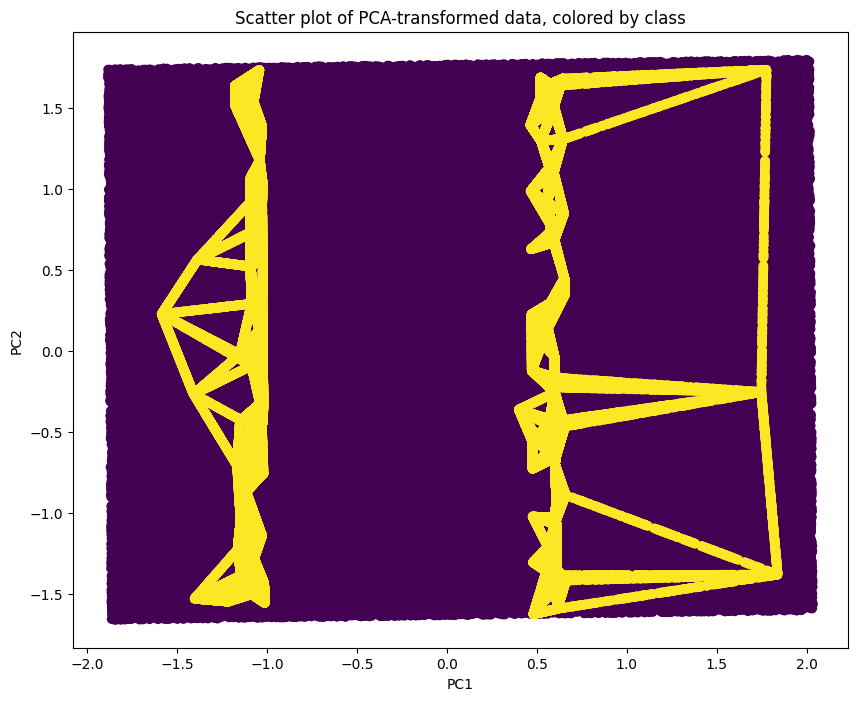

In [ ]:
# prompt: plot X_train_oversampled_pca_scaled in a cartessian plan and color code according to y_train_oversampled

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))

plt.scatter(X_train_oversampled_pca_scaled[:, 0], X_train_oversampled_pca_scaled[:, 1], c=y_train_oversampled, cmap='viridis')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Scatter plot of PCA-transformed data, colored by class')
plt.show()


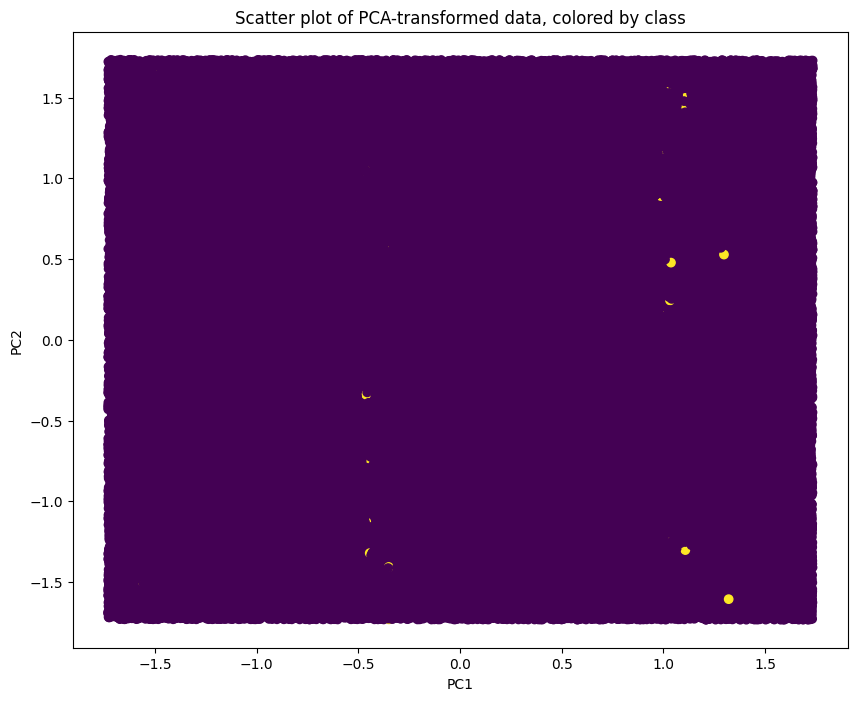

In [ ]:
#Visualizing the original
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
Xp
# prompt: plot X_train_oversampled_pca_scaled in a cartessian plan and color code according to y_train_oversampled

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))

plt.scatter(X_train_pca_scaled[:, 0], X_train_pca_scaled[:, 1], c=y_train, cmap='viridis')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Scatter plot of PCA-transformed data, colored by class')
plt.show()



Simple linear NN to combine the outputs of the previous models.
Make sure to use the correct "input_count" when calling the model.

In [ ]:
!pip install torch torchaudio torchvision torchtext torchdata

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [ ]:
class LinearModel(nn.Module):
  def __init__(self, input_count, output_count):
    super(model, self).__init__()
    self.fc1 = nn.Linear(input_count, 10)
    self.fc2 = nn.Linear(10, 4)
    self.fc3 = nn.Linear(4, output_count)

  def forward(self, features):
    x = F.relu(self.fc1(features))
    x = F.relu(self.fc2(x))
    return torch.sigmoid(self.fc3(x))

In [ ]:
def count_predictions(outputs, labels):
  pass

In [ ]:
def evaluate():
  pass

In [ ]:
def main_nn():
  input_count = 4
  output_count = 1
  epochs = 10
  batch_size = 512
  learning_rate = 0.0025

  train_split = 0.7
  valid_split = 1.0 - train_split

  # Use CUDA if available
  device = torch.device('cuda:0' if torch.cuda.is_available() else 'CPU')
  print(f'Device: {'CUDA' if torch.cuda.is_available() else 'CPU'}')

  net = LinearModel(input_count, output_count).to(device)
  criterion = nn.MSELoss()
  # criterion = nn.CrossEntropyLoss()
  optimizer = torch.optim.SGD(net.parameters(), lr=learning_rate)

  t_acc = []
  t_loss = []
  v_acc = []
  v_loss = []

  for e in range(0, epochs):
    running_loss = 0.0
    t_acc_temp = []

    # Train
    for i, data in enumerate(train_loader, 0):
      inputs, labels = data
      inputs = inputs.to(device)
      labels = labels.to(device)

      optimizer.zero_grad()

      outputs = net(outputs)

      loss = criterion(outputs.squeeze(), labels)
      # loss = criterion(outputs, labels)

      loss.backward()
      optimizer.step()

      t_acc_temp.append(count_predictions(outputs, labels))
      running_loss += loss.item()

    # Evaluate
    v_loss_temp, v_acc_temp = evaluate(net, valid_loader, criterion)

    v_loss.append(v_loss_temp)
    v_acc.append(v_acc_temp)

    t_loss.append(running_loss / (total_rows * train_split))
    t_acc.append(sum(t_acc_temp) / len(t_acc_temp))

  torch.save(net, 'linear_model.pt')

In [ ]:
main_nn()